### Twitter Sentiment Analysis / Classification of the Sentiment of the Text

In [1]:
import pandas as pd

feature_names=['target','ids','date','flag','user','text']
data = pd.read_csv('Dataset/Twitter_Dataset.csv',names=feature_names,encoding='ISO-8859-1')

In [2]:
data.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
import numpy as np
import os
import importlib
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
plt.style.use('default')
warnings.filterwarnings('ignore')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
# Checking if the data how many missing values are there
data.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [6]:
#check for duplicate records
data[data.duplicated()].shape[0]

0

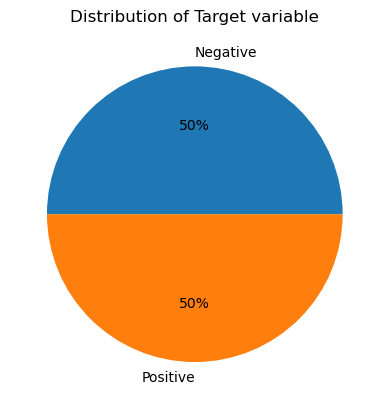

In [7]:
#check the distribution of target variable
plt.pie(data['target'].value_counts(),autopct='%2.f%%',labels=['Negative','Positive'])
plt.title('Distribution of Target variable')
plt.show()

##### here we can see the dataset which we are having is balanced dataset

In [8]:
data=data[['text','target']]

In [9]:
data.head(8)

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
5,@Kwesidei not the whole crew,0
6,Need a hug,0
7,@LOLTrish hey long time no see! Yes.. Rains a...,0


In [10]:
data['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

##### 0 == Negative sentiment and 4 == Positive sentiment

In [11]:
#lets replace 4 with 1 to make it more convenient
data['target']=data['target'].replace(4,1)

In [12]:
data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

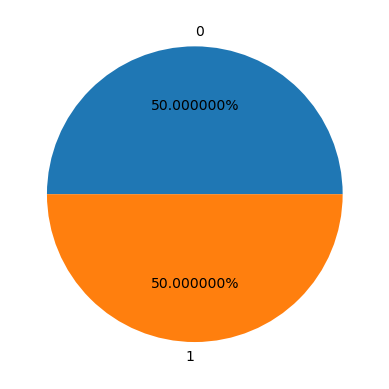

In [13]:
target_counts=data['target'].value_counts()
plt.pie(target_counts.values,autopct='%2f%%',labels=target_counts.index)
plt.show()

In [14]:
#out dataset is massive so lets take total 40k samples for sentiments ( for each each class 20k samples )
negative_tweets=data[data['target']==0].sample(200000)
positive_tweets=data[data['target']==1].sample(200000)
#and combine both class samples
sentiments=pd.concat([negative_tweets,positive_tweets],ignore_index=True)
sentiments.rename(columns={'text':'tweet'},inplace=True)

In [15]:
sentiments.head()

,tweet,target
0,"@tommcfly plz say &quot;Happy Birthday Or , Ro...",0
1,Importing video to idvd. A bit of a pain in th...,0
2,Ummm wuts wrong wit my computer? it won't typ...,0
3,i cant sleep,0
4,Signature of @brian09 wiped off from my phone....,0


In [16]:
#convert all the tweet text into lower case
sentiments['tweet']=sentiments['tweet'].str.lower()


In [17]:
#as we can see all the tweets are convert into lower case
sentiments.head(5)

,tweet,target
0,"@tommcfly plz say &quot;happy birthday or , ro...",0
1,importing video to idvd. a bit of a pain in th...,0
2,ummm wuts wrong wit my computer? it won't typ...,0
3,i cant sleep,0
4,signature of @brian09 wiped off from my phone....,0


### Text Preprocessing using NLTK Library

In [18]:
import nltk
#download stopwords and punctuation
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
#Get the list of english language stopwords from the nltk corpus
from nltk.corpus import stopwords
english_stopwords=stopwords.words('english')
STOPWORDS=set(english_stopwords)

In [20]:
#clean/remove stopwords from the tweets
def clean_stopwords(text):
  value=' '.join(word for word in text.split() if word not in STOPWORDS)
  return value

In [21]:
#apply clean_stopwords function on tweet to remove the stopwords.
sentiments['tweet']=sentiments['tweet'].apply(lambda x: clean_stopwords(x))

In [22]:
import string
english_punctuations=string.punctuation
print(english_punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [23]:
#clearning and removing punctuations
import string
english_punctuations=string.punctuation

punctuation_list=english_punctuations

def cleaning_punctuations(text):
    translator=str.maketrans('', '',punctuation_list)
    return text.translate(translator)

sentiments["tweet"]=sentiments["tweet"].apply(lambda text: cleaning_punctuations(text))

In [24]:
#check top 10 tweets after stopwords and punctuation removal to make sure we have successfully cleaned the tweet
sentiments.head(10)

,tweet,target
0,tommcfly plz say quothappy birthday roni amp ...,0
1,importing video idvd bit pain ass slow cant op...,0
2,ummm wuts wrong wit computer type rightlike ty...,0
3,cant sleep,0
4,signature brian09 wiped phone sadddd,0
5,im fed up httptweetsg,0
6,want know,0
7,queue m1parkway abut long,0
8,desperately needs download popular,0
9,super important still wahinducing akira neighb...,0


In [25]:
sentiments.shape

(400000, 2)

In [26]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

sentiments["tweet"] = sentiments["tweet"].apply(lambda text: cleaning_repeating_char(text))
print(sentiments.head())

                                               tweet  target
0  tomcfly plz say quothapy birthday roni amp mic...       0
1  importing video idvd bit pain as slow cant ope...       0
2  um wuts wrong wit computer type rightlike typi...       0
3                                          cant slep       0
4                  signature brian09 wiped phone sad       0


In [27]:
#cleaning removing URL from tweet
def cleaning_url(text):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',text)

sentiments["tweet"]=sentiments["tweet"].apply(lambda text: cleaning_url(text))
sentiments.head()

,tweet,target
0,tomcfly plz say quothapy birthday roni amp mic...,0
1,importing video idvd bit pain as slow cant ope...,0
2,um wuts wrong wit computer type rightlike typi...,0
3,cant slep,0
4,signature brian09 wiped phone sad,0


In [28]:
#clearning and removing numeric numbers
def cleaning_numbers(text):
    return re.sub('[0-9]+', '',text)

sentiments["tweet"]=sentiments["tweet"].apply(lambda text: cleaning_numbers(text))
sentiments.head()

,tweet,target
0,tomcfly plz say quothapy birthday roni amp mic...,0
1,importing video idvd bit pain as slow cant ope...,0
2,um wuts wrong wit computer type rightlike typi...,0
3,cant slep,0
4,signature brian wiped phone sad,0


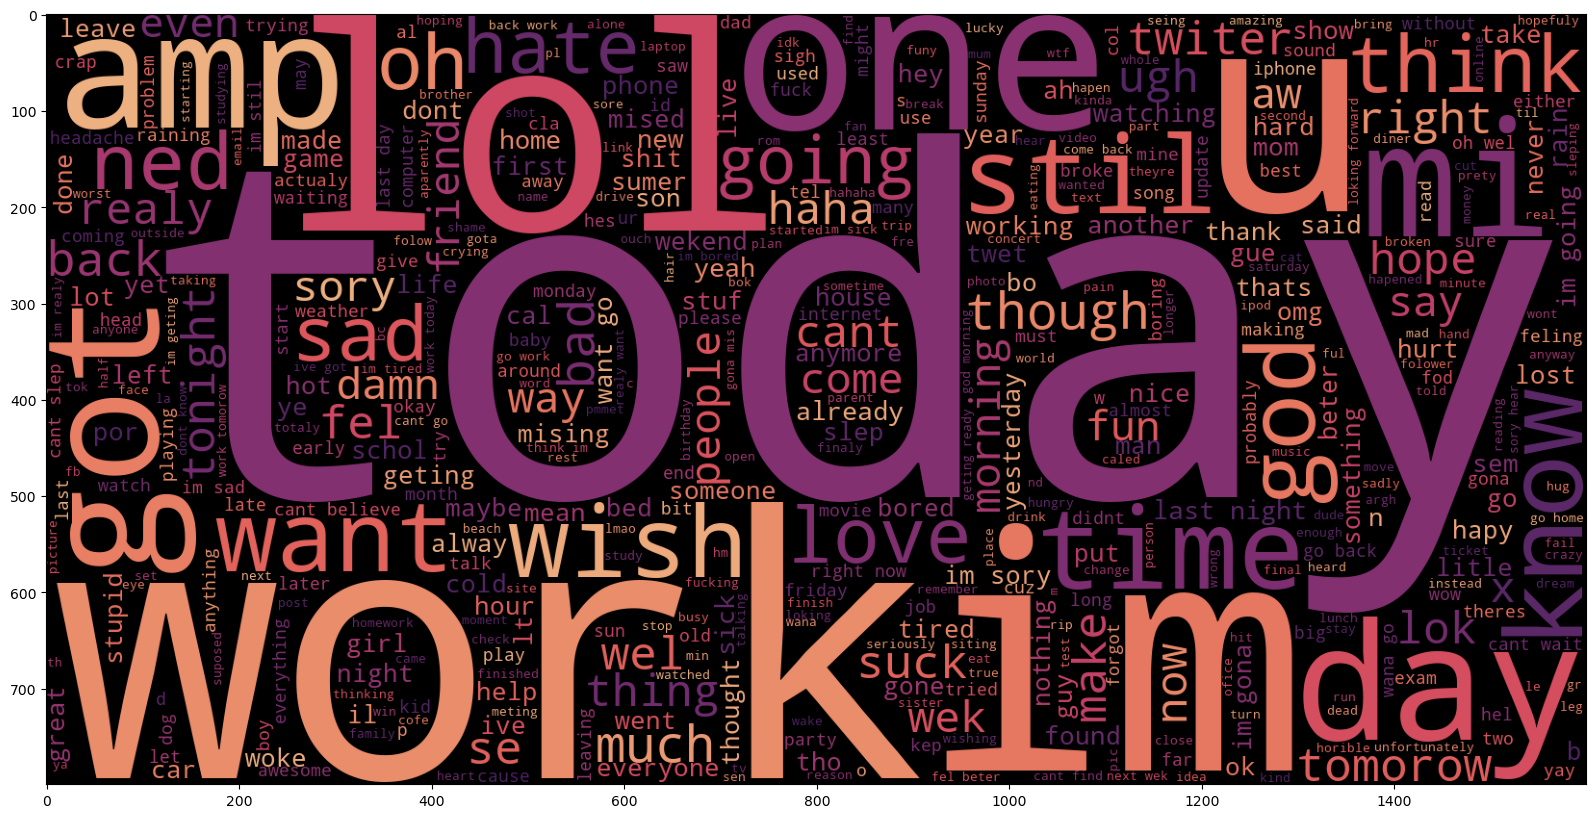

In [29]:
#plot cloud of words for negative class
negative_tweets=sentiments[sentiments["target"]==0]["tweet"]
plt.figure(figsize=(20,10))
from wordcloud import WordCloud

wc= WordCloud(max_words=1000, min_font_size=10, height=800, width=1600, background_color='black', colormap='flare').generate(' '.join(np.array(negative_tweets)))
plt.imshow(wc)
plt.show()

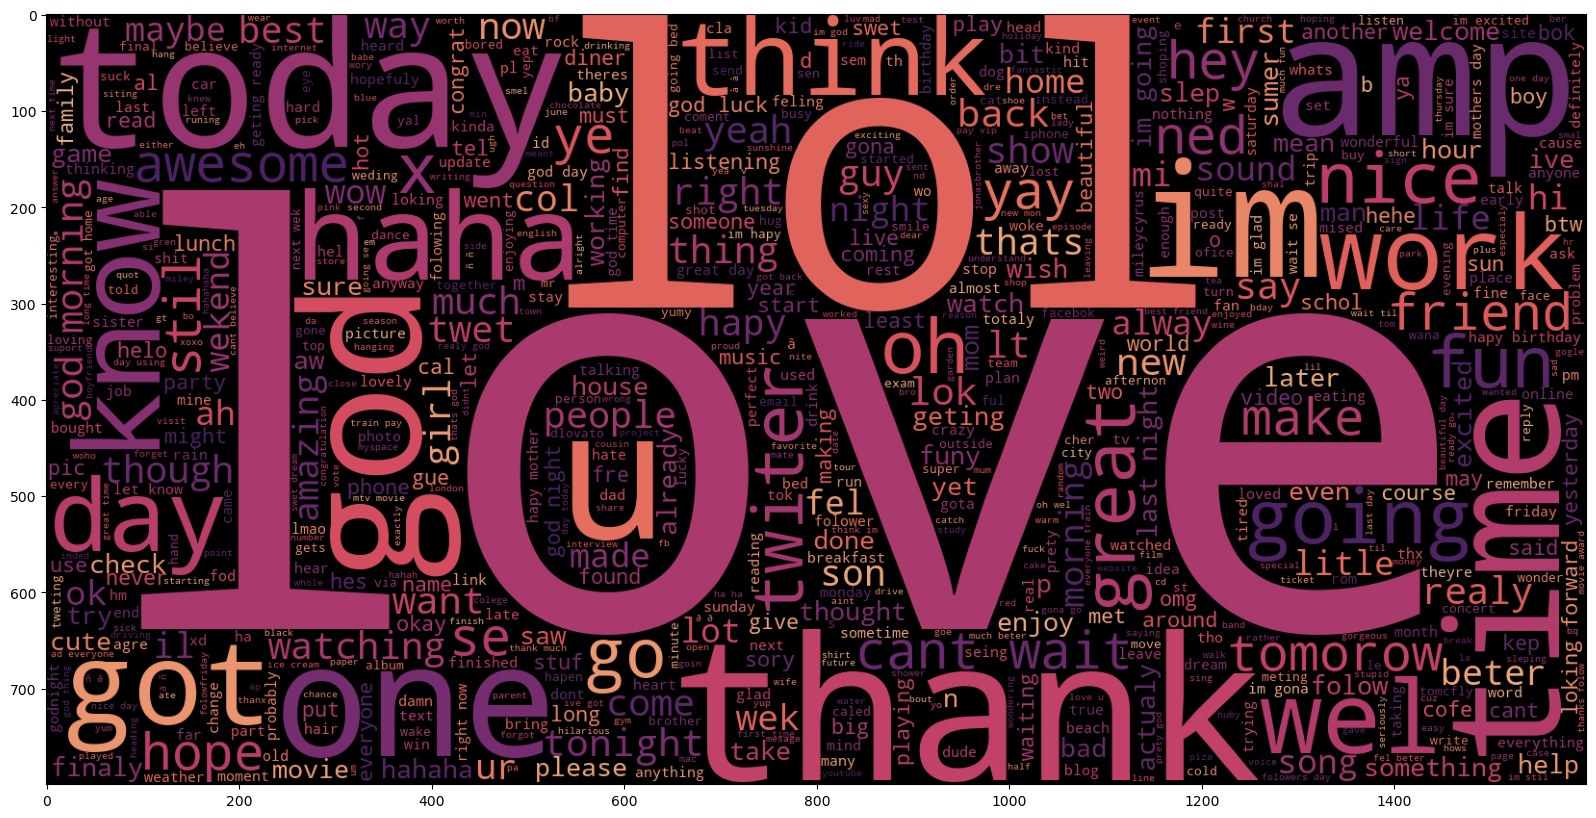

In [30]:
#plot cloud of words for positive class
positive_tweets=sentiments[sentiments["target"]==1]["tweet"]
plt.figure(figsize=(20,10))

wc= WordCloud(max_words=1000, min_font_size=10, height=800, width=1600, background_color='black', colormap='flare').generate(' '.join(np.array(positive_tweets)))
plt.imshow(wc)
plt.show()

In [31]:
sentiments.head()

,tweet,target
0,tomcfly plz say quothapy birthday roni amp mic...,0
1,importing video idvd bit pain as slow cant ope...,0
2,um wuts wrong wit computer type rightlike typi...,0
3,cant slep,0
4,signature brian wiped phone sad,0


In [32]:
#word tokenization of tweet
from nltk.tokenize import word_tokenize
sentiments["tweet"]=sentiments["tweet"].apply(word_tokenize)
sentiments.head()

,tweet,target
0,"[tomcfly, plz, say, quothapy, birthday, roni, ...",0
1,"[importing, video, idvd, bit, pain, as, slow, ...",0
2,"[um, wuts, wrong, wit, computer, type, rightli...",0
3,"[cant, slep]",0
4,"[signature, brian, wiped, phone, sad]",0


In [33]:
#apply lemmatizer on sentiments.
nltk.download('wordnet')
lm=nltk.WordNetLemmatizer()

def lemmatizer_on_word(text):
    data=[lm.lemmatize(word) for word in text]
    return data
sentiments["tweet"]=sentiments["tweet"].apply(lambda text:lemmatizer_on_word(text))
sentiments.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweet,target
0,"[tomcfly, plz, say, quothapy, birthday, roni, ...",0
1,"[importing, video, idvd, bit, pain, a, slow, c...",0
2,"[um, wuts, wrong, wit, computer, type, rightli...",0
3,"[cant, slep]",0
4,"[signature, brian, wiped, phone, sad]",0


In [34]:
#remove commma and convert tokens into string before fitting to the model (it's depends on model to model)
sentiments["tweet"]=[" ".join(line)for line in sentiments["tweet"]]

In [35]:
sentiments.head(2)

,tweet,target
0,tomcfly plz say quothapy birthday roni amp mic...,0
1,importing video idvd bit pain a slow cant open...,0


In [36]:
#spliting data into train and test subsets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(sentiments["tweet"],sentiments["target"],test_size=0.2,random_state=43)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320000,), (80000,), (320000,), (80000,))

### Model 1 : Logistic Regression 

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
lr_model = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("logistic", LogisticRegression(C=1,solver='lbfgs',max_iter=100)) # model the text
])

lr_model.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('logistic', LogisticRegression(C=1))])

In [38]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
#function to make prediction and evaluate the performance of the model.
def predict_and_evaluate_model_performance(model,test_data):
    y_pred=model.predict(test_data)
    print("Training Score : ",model.score(x_train,y_train))
    print("validation Score : ",accuracy_score(y_test,y_pred))
    print("Precision Score : ",precision_score(y_test,y_pred))
    print("Recall Score : ",recall_score(y_test,y_pred))
    print("F1 Score : ",f1_score(y_test,y_pred))
    print("="*100)
    print("Classification Report : ",classification_report(y_test,y_pred))
    print("="*100)
    cm=confusion_matrix(y_test,y_pred)
    print(cm)

In [39]:
#this method takes model and test data as an argument.
predict_and_evaluate_model_performance(lr_model,x_test)

Training Score :  0.825209375
validation Score :  0.7764375
Precision Score :  0.7673673479295111
Recall Score :  0.792033070274333
F1 Score :  0.779505134811929
Classification Report :                precision    recall  f1-score   support

           0       0.79      0.76      0.77     40085
           1       0.77      0.79      0.78     39915

    accuracy                           0.78     80000
   macro avg       0.78      0.78      0.78     80000
weighted avg       0.78      0.78      0.78     80000

[[30501  9584]
 [ 8301 31614]]


### Model 2 : BernoulliNB

In [40]:
from sklearn.naive_bayes import BernoulliNB
nb_model=Pipeline([
        ("tfidf",TfidfVectorizer()),
        ("bernominal",BernoulliNB())
])

nb_model.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('bernominal', BernoulliNB())])

In [41]:
#this method takes model and test data as an argument.
predict_and_evaluate_model_performance(nb_model,x_test)

Training Score :  0.851390625
validation Score :  0.7646875
Precision Score :  0.7780267875975533
Recall Score :  0.7392960040085181
F1 Score :  0.7581670798915767
Classification Report :                precision    recall  f1-score   support

           0       0.75      0.79      0.77     40085
           1       0.78      0.74      0.76     39915

    accuracy                           0.76     80000
   macro avg       0.77      0.76      0.76     80000
weighted avg       0.77      0.76      0.76     80000

[[31666  8419]
 [10406 29509]]


### Model 3 : XGBoost

In [42]:
from xgboost import XGBClassifier
xg_model=Pipeline([
        ("tfidf",TfidfVectorizer()),
        ("xgboost",XGBClassifier())
])
xg_model.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [43]:
#this method takes model and test data as an argument.
predict_and_evaluate_model_performance(xg_model,x_test)

Training Score :  0.750171875
validation Score :  0.7378875
Precision Score :  0.7012534523050775
Recall Score :  0.8269572842289866
F1 Score :  0.7589354486405703
Classification Report :                precision    recall  f1-score   support

           0       0.79      0.65      0.71     40085
           1       0.70      0.83      0.76     39915

    accuracy                           0.74     80000
   macro avg       0.75      0.74      0.74     80000
weighted avg       0.75      0.74      0.74     80000

[[26023 14062]
 [ 6907 33008]]


### We can see that Logistic Regression have good validation score we are choosing this model :

In [44]:
import joblib
joblib.dump(lr_model, 'model.pkl')

['model.pkl']

In [45]:
row = x_test.iloc[25] 
print(row)

# Make a prediction
prediction = lr_model.predict([row])
print(prediction)  

threw back playing basketbal im supose begin trip day
[0]
